# Lloyd-Max quantization

In [ ]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

## Test 1 KMedoids

In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import math

def MSE(x, y):
    d = x-y
    dd = d*d
    #print(x, y, x.shape, y.shape)
    #return math.sqrt(np.sum(dd)/len(dd))
    return np.sum(dd)/len(dd)

def lagrangian(x, y):
    return math.abs(x - y)

X = np.asarray([[1, 2], [1, 4], [1, 0],
                [4, 2], [4, 4], [4, 0]])

#kmedoids = KMedoids(n_clusters=2, random_state=0, metric=MSE).fit(X)
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
print("labels =", kmedoids.labels_)

kmedoids.predict([[0,0], [4,4]])

print("centers =", kmedoids.cluster_centers_)

print("inertia =", kmedoids.inertia_)

## Test 1 KMeans

In [ ]:
from sklearn.cluster import KMeans

X = np.asarray([[1, 2], [1, 4], [1, 0],
                [4, 2], [4, 4], [4, 0]])

kmeans = KMeans(n_clusters=2, random_state=0)
#kmeans.fit(X)
Y = kmeans.fit_transform(X)
print("labels =", kmeans.labels_)

kmeans.predict([[0,0], [4,4]])

print("centers =", kmeans.cluster_centers_)

print("inertia =", kmeans.inertia_)

print(X, Y)
#kmeans.get_feature_names_out()
#kmeans.get_params()
kmeans.score(Y)

## Color Vector Quantization using KMeans

In [ ]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## Color Vector Quantization using KMedoids

In [ ]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMedoids(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Medoids)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## Lloyd-Max quantization (of a gray-scaled image) using KMedoids

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 8

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) #/ 255
print(china.shape)
china = (( china[...,0] + china[...,1] + china[...,0] ) / 3).astype(np.uint8)

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(china.shape)
image_array = np.reshape(china, w * h)

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000).reshape(-1, 1)
kmeans = KMedoids(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array.reshape(-1, 1))
print(f"done in {time() - t0:0.3f}s.")
print(np.unique(labels))

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
#labels_random = pairwise_distances_argmin(codebook_random, image_array.reshape(-1, 1), axis=0)
#print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Medoids)")
y = recreate_image(kmeans.cluster_centers_, labels, w, h)
print(np.unique(y))
plt.imshow(y)

#plt.figure(3)
#plt.clf()
#plt.axis("off")
#plt.title(f"Quantized image ({n_colors} colors, Random)")
#plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## Voronoi diagram of the hand-written digits using KMeans

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Voronoi diagram of the hand-written digits using KMedoids

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

#from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids as KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(n_clusters=n_digits, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(n_clusters=n_digits, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(n_clusters=n_digits)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=n_digits)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-medoids clustering on the digits dataset (PCA-reduced data)\n"
    "Centers are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Using a lagrangian $J =D+\lambda R$ distance metric

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import math

def entropy(sequence_of_symbols):
    assert sequence_of_symbols.ndim == 1
    value, counts = np.unique(sequence_of_symbols, return_counts = True)
    probs = counts / len(sequence_of_symbols)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    _entropy = 0.
    for i in probs:
        _entropy -= i * math.log(i, 2)

    return _entropy

_lambda = 1.0 # This represents a slope and therefore, the dynamic ranges of the axis R and D are relevant

def lagrangian(x, y):
    distortion = abs(x - y)
    return distortion
    #rate = math.log(np.sum(abs(x-y)) + 1)
    #return distortion + _lambda * rate

def lagrangian(x, y):
    d = x-y
    dd = d*d
    #print(x, y, x.shape, y.shape)
    #return math.sqrt(np.sum(dd)/len(dd))
    distortion = math.sqrt(np.sum(dd)/len(dd)) # dd is an array of 3 components (RGB)
    rate = math.log(np.sum(abs(d)) + 1)
    #print(np.sum(abs(x-y)), rate, x.shape, y.shape)
    return distortion + _lambda * rate

n_colors = 8

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMedoids(n_clusters=n_colors, random_state=0, metric=lagrangian).fit(image_array_sample)
#kmeans = KMedoids(n_clusters=n_colors, random_state=0).fit(image_array_sample)

print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Medoids)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## Quantizing a gray-scaled image

In [ ]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

In [ ]:
%%bash
if [ -d "$HOME/repos/image_IO" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/image_IO ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/image_IO.git
fi

In [ ]:
%%bash
if [ -d "$HOME/repos/information_theory" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/information_theory ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/information_theory.git
fi

In [ ]:
!ln -sf ~/repos/image_IO/image_1.py .
!ln -sf ~/repos/image_IO/logging_config.py .
!ln -sf ~/repos/information_theory/distortion.py .
!ln -sf ~/repos/information_theory/information.py .

In [3]:
import LloydMax_quantization as quantization
import image_1 as gray_image
import os
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.utils import shuffle
import numpy as np
import distortion

In [4]:
home = os.environ["HOME"]
fn = home + "/repos/MRVC/images/lena_bw/"
#fn = home + "/repos/MRVC/images/circle/"
#fn = home + "/repos/MRVC/images/Hommer_bw/"
!ls -l {fn}

# Quantizer selection
quantizer = quantization.LloydMax_Quantizer

n_clusters = 4  # Number of bins
N_tries = 4  # Number of times K-means is run

#N_bins = range(2, 128, 1)
#N_bins = [2, 4, 8, 16, 32] #range(2, 128, 1)
N_bins = [8]

gray_image.write = gray_image.debug_write

total 148
-rw-r--r-- 1 vruiz vruiz 151199 feb 18  2022 000.png


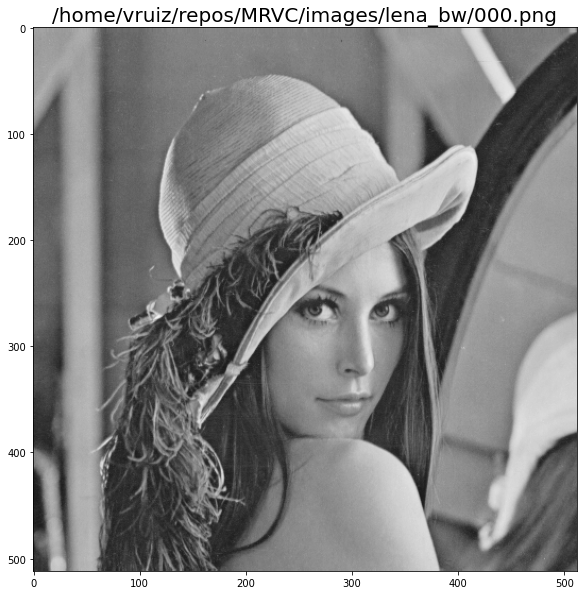

In [5]:
img = gray_image.read(fn, 0)
gray_image.show(img, fn + "000.png")

(512, 512)
Fitting model on a small sub-sample of the data
done in 0.072s.
Predicting color indices on the full image (k-means)
done in 1.839s.
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
Predicting color indices on the full image (random)
[ 28.  33.  35.  36.  37.  39.  41.  42.  43.  44.  45.  47.  49.  50.
  51.  52.  53.  55.  56.  57.  59.  62.  65.  66.  69.  70.  72.  76.
  78.  81.  84.  86.  88.  90.  92.  93.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 110. 113. 115. 117. 118. 119. 120.

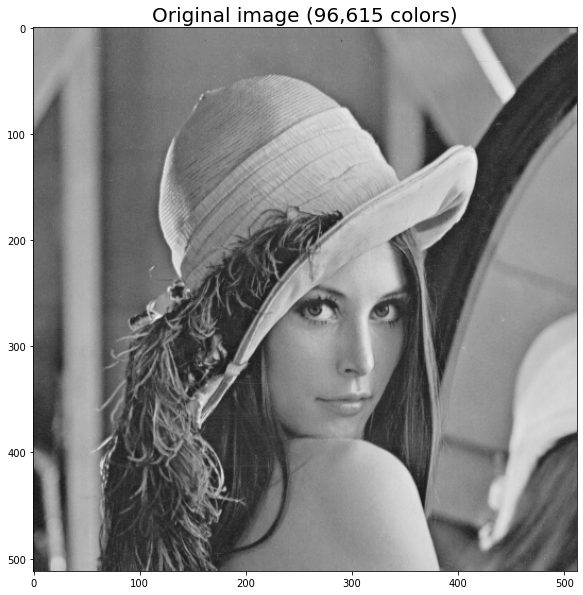

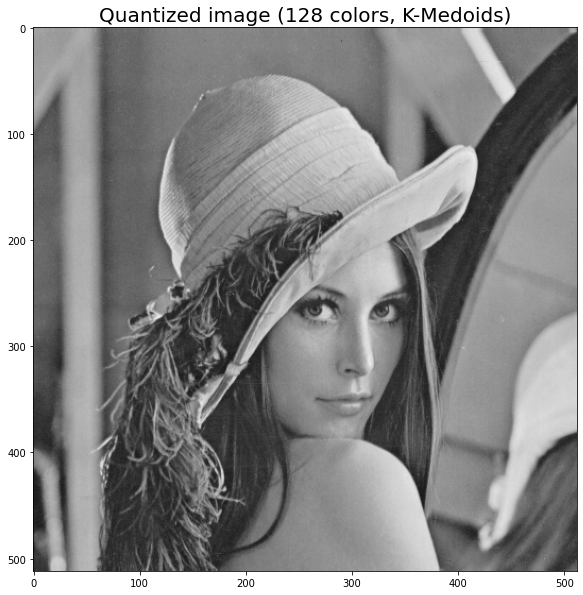

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 128

# Load the Summer Palace photo
china = img # load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) #/ 255
print(china.shape)
#china = (( china[...,0] + china[...,1] + china[...,0] ) / 3).astype(np.uint8)

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(china.shape)
image_array = np.reshape(china, w * h)

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000).reshape(-1, 1)
kmeans = KMedoids(init="k-medoids++", n_clusters=n_colors, random_state=0).fit(image_array_sample)
#kmeans = KMedoids(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array.reshape(-1, 1))
print(f"done in {time() - t0:0.3f}s.")
print(np.unique(labels))

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
#labels_random = pairwise_distances_argmin(codebook_random, image_array.reshape(-1, 1), axis=0)
#print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


gray_image.show(china, "Original image (96,615 colors)")
y = recreate_image(kmeans.cluster_centers_, labels, w, h)
print(np.unique(y))
gray_image.show(y, f"Quantized image ({n_colors} colors, K-Medoids)")

## Another example of quantizing a gray-scaled image

In [ ]:
def quantize_using_kmeans(img, N_bins=8):
    flatten_img = img.reshape((-1, 1))  # flatten
    clusterer = KMeans(n_clusters=N_bins)
    clusterer.fit(flatten_img)
    centroids = clusterer.cluster_centers_.squeeze().astype(np.uint8)  # Centroids
    k = clusterer.labels_.astype(np.uint8)  # Labels of the centroids
    y = centroids[k]
    y.shape = img.shape
    k.shape = img.shape
    print("Used quantization indexes:", np.unique(k))
    _distortion = distortion.RMSE(img, y)
    gray_image.show_normalized(k, f"Quantization Indexes (N_bins={N_bins})")
    gray_image.show(y, f"Reconstruction (N_bins={N_bins})")
    print(f"N_bins={N_bins:>3}, distortion={_distortion:>6.1f}")
quantize_using_kmeans(img)

In [ ]:
def quantize_using_kmedoids(img, N_bins=8):
    flatten_img = img.reshape((-1, 1))  # flatten
    clusterer = KMedoids(init="k-medoids++", n_clusters=N_bins)
    #clusterer = KMeans(n_clusters=N_bins)
    image_array_sample = shuffle(flatten_img, random_state=0, n_samples=1_000)
    print("Input pixels:", np.unique(image_array_sample))
    clusterer.fit(image_array_sample)
    k = clusterer.predict(flatten_img)
    y = clusterer.cluster_centers_[k]
    centroids = clusterer.cluster_centers_
    #print(centroids)
    k.shape = img.shape
    y.shape = img.shape
    print("Used quantization indexes:", np.unique(k))
    _distortion = distortion.RMSE(img, y)
    gray_image.show_normalized(k, f"Quantization Indexes (N_bins={N_bins})")
    gray_image.show(y, f"Reconstruction (N_bins={N_bins})")
    print(f"N_bins={N_bins:>3}, distortion={_distortion:>6.1f}")
quantize_using_kmedoids(img, 8)

## Using the library

In [ ]:
def RD_curve_sorted_labels(img, N_bins):
    points = []
    for n in N_bins:
        Q_step = 256//n
        Q = quantizer(img, Q_step=Q_step)
        y, k = Q.quan_dequan(img)
        print("Quantization indexes:", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(n) + '_', 0)*8/(k.shape[0]*k.shape[1])
        with open("/tmp/representation_levels.uint8", mode="wb") as f:
            Q.get_representation_levels().tofile(f)
        rate += (os.path.getsize("/tmp/representation_levels.uint8")*8/(k.shape[0]*k.shape[1]))
        #with gzip.GzipFile("/tmp/representation_levels.npy.gz", "w") as f:
        #    np.save(file=f, arr=Q.get_representation_levels())
        #rate += (os.path.getsize("/tmp/representation_levels.npy.gz")*8/(k.shape[0]*k.shape[1]))
        #_distortion = distortion.RMSE(img, y)
        _distortion = distortion.RMSE(img, np.round(y).astype(np.uint8))
        gray_image.show_normalized(k, f"Quantization Indexes (N_bins={n})")
        #if n<16:
        #    plt.imshow(y, cmap=plt.cm.gray, vmin=0, vmax=256)
        #    plt.show()
        points.append((rate, _distortion))
        print(f"N_bins={n:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points

RD_points_sorted_labels = RD_curve_sorted_labels(img, N_bins)

In [ ]:
def quantize_using_kmeans(img, N_bins=8):
    Q_step = 256//N_bins
    Q = quantizer(img, Q_step)
    y, k = Q.quan_dequan(img)
    print("Used quantization indexes:", np.unique(k))
    _distortion = distortion.RMSE(img, y)
    gray_image.show_normalized(k, f"Quantization Indexes (N_bins={N_bins})")
    gray_image.show(y, f"Reconstruction (N_bins={N_bins})")
    print(f"N_bins={N_bins:>3}, distortion={_distortion:>6.1f}")
quantize_using_kmeans(img)

In [ ]:
def quantize_using_kmedoids(img, N_bins=8):
    Q_step = 256//N_bins
    Q = quantizer(img, Q_step, use_medoid=True)
    y, k = Q.quan_dequan(img)
    print("Used quantization indexes:", np.unique(k))
    _distortion = distortion.RMSE(img, y)
    gray_image.show_normalized(k, f"Quantization Indexes (N_bins={N_bins})")
    gray_image.show(y, f"Reconstruction (N_bins={N_bins})")
    print(f"N_bins={N_bins:>3}, distortion={_distortion:>6.1f}")
quantize_using_kmedoids(img)

## Using (again) a lagrangian $J =D+\lambda R$ distance metric with the library

In [ ]:
def quantize_using_kmedoids(img, N_bins=8, _lambda=1.0):
    def lagrangian(x, y):
        d = x-y
        dd = d*d
        distortion = math.sqrt(dd/len(dd))
        rate = math.log(abs(d) + 1)
        return distortion + _lambda * rate
    
    Q_step = 256//N_bins
    Q = quantizer(img, Q_step, use_medoid=True, metric=lagrangian)
    y, k = Q.quan_dequan(img)
    print("Used quantization indexes:", np.unique(k))
    _distortion = distortion.RMSE(img, y)
    gray_image.show_normalized(k, f"Quantization Indexes (N_bins={N_bins})")
    gray_image.show(y, f"Reconstruction (N_bins={N_bins})")
    print(f"N_bins={N_bins:>3}, distortion={_distortion:>6.1f}")

quantize_using_kmedoids(img, 8, 0)
quantize_using_kmedoids(img, 8, 1)
quantize_using_kmedoids(img, 8, 1000)

In [ ]:
def quantize_using_kmedoids(img, N_bins=8, _lambda=1.0):
    def lagrangian(x, y):
        d = x-y
        dd = d*d
        distortion = math.sqrt(dd/len(dd))
        rate = math.log(abs(d) + 1)
        return distortion + _lambda * rate

    Q_step = 256//N_bins
    Q = quantizer(img, Q_step, use_medoid=True, metric=lagrangian)
    y, k = Q.quan_dequan(img)
    print("Used quantization indexes:", np.unique(k))
    _distortion = distortion.RMSE(img, y)
    print(f"lambda={_lambda:>6.1f}, N_bins={N_bins:>3}, distortion={_distortion:>6.1f}")
    return y

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for _lambda in [0, 0.5, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]:
    if _lambda == 0:
        ax.imshow(img, cmap="gray")  # show an initial one first
        t = ax.annotate("original", (10,20))
    else:
        y = quantize_using_kmedoids(img, 8, _lambda)
        _distortion = distortion.RMSE(img, y)
        im = ax.imshow(y, animated=True, cmap="gray")
        t = ax.annotate(f"lambda={_lambda} distortion={_distortion}", (10,20))
    ims.append([im, t])

ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

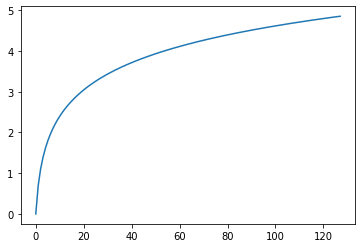

In [24]:
x = np.arange(0, 128)   # start,stop,step
y = np.log(x + 1)
plt.plot(x, y)
plt.show()

In [16]:
import math

def quantize_using_kmedoids(img, information_of_symbols, N_bins=8, _lambda=1.0):
    def lagrangian(x, y):
        d = x-y
        dd = d*d
        distortion = math.sqrt(dd/len(dd))
        rate = information_of_symbols[abs(d)] # We suppose that the histogram of <d> shows a symmetry centered at 0
        return distortion + _lambda * rate

    Q_step = 256//N_bins
    Q = quantizer(img, Q_step, use_medoid=True, metric=lagrangian)
    y, k = Q.quan_dequan(img)
    print("Used quantization indexes:", np.unique(k))
    _distortion = distortion.RMSE(img, y)
    print(f"lambda={_lambda:>6.1f}, N_bins={N_bins:>3}, distortion={_distortion:>6.1f}")
    return y

def symbols_information(sequence_of_symbols):
    assert sequence_of_symbols.ndim == 1
    value, counts = np.unique(sequence_of_symbols, return_counts = True)
    probs = counts / len(sequence_of_symbols)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    information_of_symbols = []
    for i in probs:
        information_of_symbols.append(-math.log(i, 2))

    return information_of_symbols

_lambda = 1.0

information_of_symbols = symbols_information(img.flatten())
print(information_of_symbols)

[18.0, 15.192645077942396, 13.540568381362702, 13.192645077942396, 12.022720076500086, 11.460841188891969, 10.923184402949168, 10.532394449917003, 10.192645077942396, 9.742612157307349, 9.285754482333877, 9.011315313227835, 8.754447293744319, 8.396373655013809, 8.151377059570661, 7.920515216173185, 7.679199451118364, 7.519209798904184, 7.318761588222196, 7.221922870464643, 7.149813162354226, 7.007061663834187, 6.98737546113494, 7.029175098637383, 6.976938750264666, 6.996482087891398, 7.006353939983404, 7.056752604098446, 7.149813162354226, 7.234299512348899, 7.291778269961648, 7.402878571210431, 7.470569445853849, 7.667963451638349, 7.713442238392043, 7.779621672304772, 7.997184984392946, 8.09461299498187, 8.111256751101742, 8.170277264913942, 8.238448767555521, 8.381614497741394, 8.354341567591291, 8.409412950084967, 8.400087157812873, 8.272079545436801, 8.334664082814824, 8.320519900494554, 8.354341567591291, 8.21864028647534, 8.181417822519142, 8.268680968974937, 8.20233847414624, 8

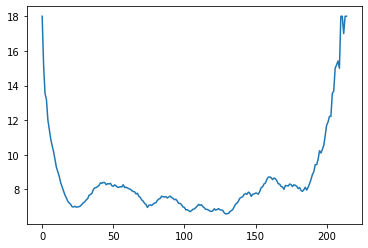

In [17]:
import matplotlib.pyplot as plt
plt.plot(information_of_symbol)

In [19]:
len(information_of_symbols)

215

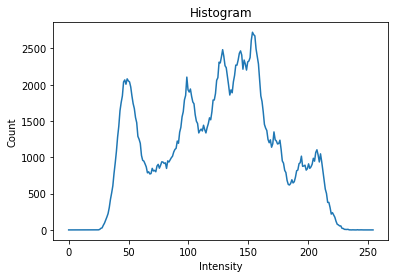

In [18]:
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))

plt.figure()
plt.title("Histogram")
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.plot(bin_edges[0:-1], histogram)